# QC for pre-processing steps

In [1]:
setwd("/home/projects/14001280/PROJECTS/blood_microbiome/")
require(tidyverse)
require(ggplot2)
require(data.table)
require(ShortRead)

Loading required package: tidyverse

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Asia/Singapore’ (or equivalent)”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘pack

In [2]:
meta <- fread("data/SG10K_Health_metadata.n10714.16March2021.parsed.csv")

In [3]:
head(meta)

npm_research_id,multiplex_pool_id,supplier_id,gis_internal_sample_id,site_supplying_sample,year_of_birth,supplied_gender,self_reported_ethnicity,extraction_kit,date_of_dna_extraction,⋯,supplied_and_computed_gender_match,sop_agreement_for_coverage__14/_28_for_15x/30x,sample_life_cycle,current,source_cohort,original_supplier_id,duplicate_info,duplicate,duplicate_pair,removal_requested_by_supplier
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WHB10000,MUX9693,00358,HELIOS_00358_1,HELIOS,1982,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00358,Unknown,PASS,Unknown,Unknown
WHB10001,MUX9693,00359,HELIOS_00359_1,HELIOS,1979,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00359,Unknown,PASS,Unknown,Unknown
WHB10002,MUX9695,00360,HELIOS_00360_1,HELIOS,1970,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,N,HELIOS VCF,Y,HELIOS,00360,Unknown,PASS,Unknown,Unknown
WHB10003,MUX9694,00361,HELIOS_00361_1,HELIOS,1969,M,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00361,Unknown,PASS,Unknown,Unknown
WHB10005,MUX9694,00363,HELIOS_00363_1,HELIOS,1959,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,N,HELIOS VCF,Y,HELIOS,00363,Unknown,PASS,Unknown,Unknown
WHB10006,MUX9694,00364,HELIOS_00364_1,HELIOS,1955,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00364,Unknown,PASS,Unknown,Unknown


### Get intermediate file directories for all pre-processing steps

In [4]:
steps <- list.dirs("data/temp_files_100")

### Iterate through preprocessing step directories and through fastq/bam/files

In [5]:
df <- tibble()

for (step in steps) {
#     step <- steps[3]
    if (grepl("_fastq|_bam", step)) {
        step_name <- strsplit(step, "/")
        step_name <- unlist(step_name)[3]
        file_names <- list.files(step)
        print(paste("pre-processing step:", step))

        for (file in file_names) {
    #         file <- file_names[40]
            file_path <- paste0(step, "/", file)

            # Get file size
            file_size <- file.size(file_path)
            npm_research_id <- strsplit(file, "\\.")
            npm_research_id <- unlist(npm_research_id)[2]

            # Get no. of reads
            if (grepl(".fastq", file_path)) {
                n_reads <- countLines(file_path) / 4
            } else {
                n_reads <- NA
            }

            morsel <- tibble(step_name = step_name, 
                             npm_research_id = npm_research_id,
                             file_size = file_size, 
                             file_name = file, 
                             n_reads = n_reads)

            df <- df %>% bind_rows(morsel)

        }
    }
}

df

[1] "pre-processing step: data/temp_files_100/01_bam"
[1] "pre-processing step: data/temp_files_100/01_fastq"
[1] "pre-processing step: data/temp_files_100/02_fastq"
[1] "pre-processing step: data/temp_files_100/03_fastq"
[1] "pre-processing step: data/temp_files_100/04_fastq"
[1] "pre-processing step: data/temp_files_100/05_fastq"
[1] "pre-processing step: data/temp_files_100/06_unclassified_fastq"


step_name,npm_research_id,file_size,file_name,n_reads
<chr>,<chr>,<dbl>,<chr>,<dbl>
01_bam,WHB6550,1163782521,MUX10033.WHB6550.unmapped-both-read-and-mate.bam,NA
01_bam,WHB6550,248600482,MUX10033.WHB6550.unmapped-both-read-and-mate.qsort.bam,NA
01_bam,WHB6583,1232266934,MUX10038.WHB6583.unmapped-both-read-and-mate.bam,NA
01_bam,WHB6583,269784110,MUX10038.WHB6583.unmapped-both-read-and-mate.qsort.bam,NA
01_bam,WHB6452,764930908,MUX10039.WHB6452.unmapped-both-read-and-mate.bam,NA
01_bam,WHB6452,175271063,MUX10039.WHB6452.unmapped-both-read-and-mate.qsort.bam,NA
01_bam,WHB7557,782912849,MUX10043.WHB7557.unmapped-both-read-and-mate.bam,NA
01_bam,WHB7557,162989586,MUX10043.WHB7557.unmapped-both-read-and-mate.qsort.bam,NA
01_bam,WHB7614,1248476545,MUX10053.WHB7614.unmapped-both-read-and-mate.bam,NA


### Files that failed CRAM to fastq extraction
These files do not have any reads/mates that are unmapped.

In [6]:
for (i in c("01_bam", "01_fastq", "02_fastq", "03_fastq", "04_fastq")) {
    n <- df %>%
        filter(!is.na(step_name)) %>% # Omit entries of directories
        filter(step_name == i) %>%
        filter(file_size != 0) %>%
        nrow()
    print(paste0(i, ": ", n))
    }

[1] "01_bam: 1326"
[1] "01_fastq: 1326"
[1] "02_fastq: 1326"
[1] "03_fastq: 1326"
[1] "04_fastq: 1326"


### Plot read count distributions

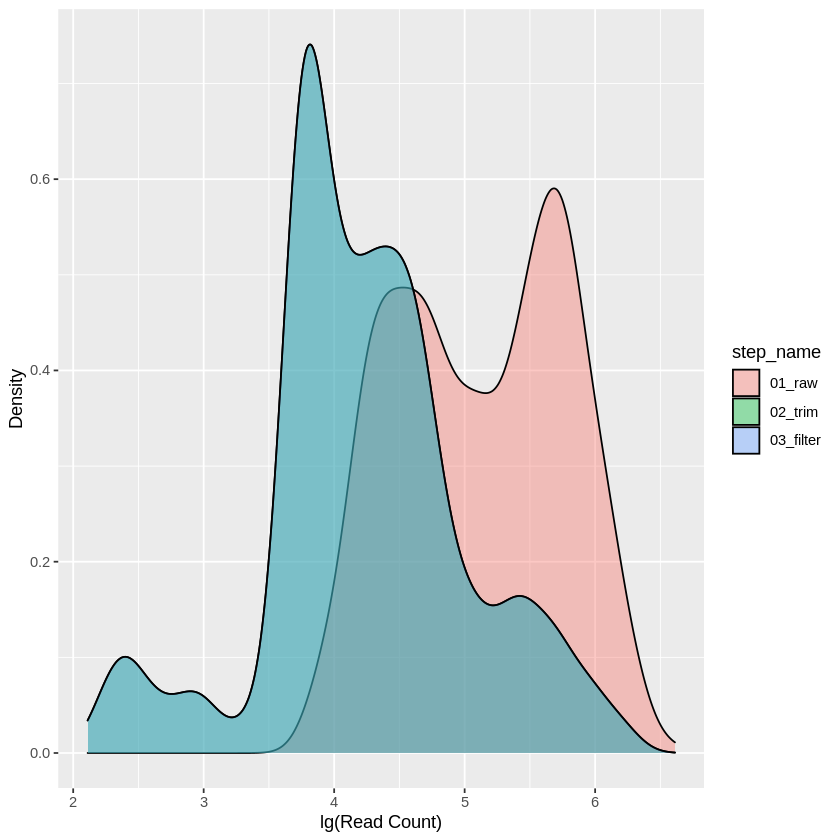

In [7]:
df %>%
    filter(grepl("01|02|03|04", step_name),
           n_reads != 0) %>%
    mutate(step_name = case_when(step_name == "01_fastq" ~ "01_raw",
                                 step_name == "02_fastq" ~ "02_trim",
                                 step_name == "03_fastq" ~ "03_filter",
                                 step_name == "04_fastq" ~ "04_low_complexity"),
           n_reads = log(n_reads, base = 10)) %>%
    filter(!grepl("04", step_name)) %>%
    ggplot(aes(x = n_reads, fill = step_name)) +
        geom_density(alpha = 0.4) +
        scale_fill_discrete() +
        labs(x = "lg(Read Count)", y = "Density")
